In [2]:
import spike.spike_analysis.decoders as decoder
import spike.spike_analysis.pca_trajectories as pca_t
import pickle
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt
from scipy.stats import sem
import math

reload(pca_t)
reload(decoder)
def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))


In [173]:
cagemate_collection = unpickle_this('cagemate_collection.pkl')
novel_collection = unpickle_this('novel_collection.pkl')



In [174]:
cagemate_collection.analyze(timebin = 100, ignore_freq=0.5, smoothing_window = 500)
novel_collection.analyze(timebin = 100, ignore_freq=0.5, smoothing_window = 500)
pre_window = 2
event_length = 5
num_folds = 5
min_neurons = 5

All set to analyze
All set to analyze


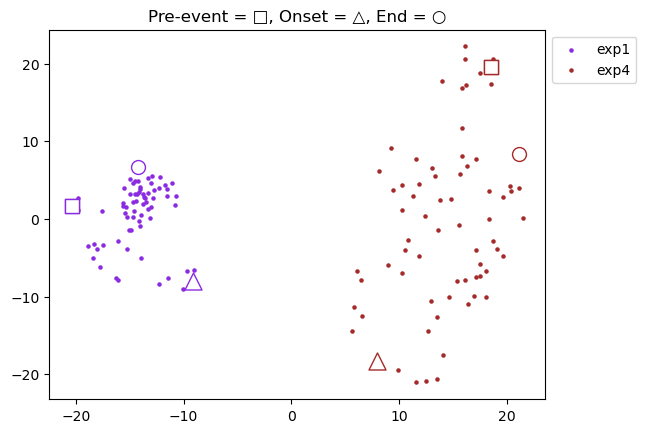

PCA Result with:
Events: exp1, exp4
Timebins per event: 70.0
Total neurons: 131
Number of recordings: 9
Number of Pcs needed to explain 90% of variance 13


In [168]:
pca_dict = pca_t.avg_trajectories_pca(cagemate_collection, event_length = event_length, pre_window = pre_window, events=['exp1','exp4'], d = 2, min_neurons = 5)
print(pca_dict)

In [169]:


cagemate_results_1v4 = decoder.trial_decoder(cagemate_collection, num_folds, 10, events = ['exp1', 'exp4'], event_length = event_length, pre_window = pre_window, min_neurons=min_neurons)
cagemate_results_1v5 = decoder.trial_decoder(cagemate_collection, num_folds, 13, events = ['exp1', 'exp5'], event_length = event_length, pre_window = pre_window, min_neurons=min_neurons)
cagemate_results_4v5 = decoder.trial_decoder(cagemate_collection, num_folds, 12, events = ['exp4', 'exp5'], event_length = event_length, pre_window = pre_window, min_neurons=min_neurons)

novel_results_1v4 = decoder.trial_decoder(novel_collection, num_folds, 4, events = ['exp1', 'exp4'], event_length = event_length, pre_window = pre_window, min_neurons=min_neurons)
novel_results_1v5 = decoder.trial_decoder(novel_collection, num_folds, 4, events = ['exp1', 'exp5'], event_length = event_length, pre_window = pre_window, min_neurons=min_neurons)
novel_results_4v5 = decoder.trial_decoder(novel_collection, num_folds, 14, events = ['exp4', 'exp5'], event_length = event_length, pre_window = pre_window, min_neurons=min_neurons)


In [170]:
pickle_this(cagemate_results_1v4, "pilot2/habit_dishabit_phase1/cagemate_results_1v4.pkl")
pickle_this(cagemate_results_1v5, "pilot2/habit_dishabit_phase1/cagemate_results_1v5.pkl")
pickle_this(cagemate_results_1v4, "pilot2/habit_dishabit_phase1/cagemate_results_4v5.pkl")

pickle_this(novel_results_1v4, "pilot2/habit_dishabit_phase1/novel_results_1v4.pkl")
pickle_this(novel_results_1v5, "pilot2/habit_dishabit_phase1/novel_results_1v5.pkl")
pickle_this(novel_results_1v4, "pilot2/habit_dishabit_phase1/novel_results_4v5.pkl")

In [3]:
cagemate_results_1v4 = unpickle_this(r'pilot2\habit_dishabit_phase1\outputs\cagemate_results_1v4.pkl')
cagemate_results_1v5 = unpickle_this(r'pilot2\habit_dishabit_phase1\outputs\cagemate_results_1v5.pkl')
cagemate_results_4v5 = unpickle_this(r'pilot2\habit_dishabit_phase1\outputs\cagemate_results_4v5.pkl')
cagemate_results_novel = unpickle_this(r'pilot2\habit_dishabit_phase1\outputs\cagemate_results_novel_not_novel.pkl')
novel_results_1v4 = unpickle_this(r'pilot2\habit_dishabit_phase1\outputs\novel_results_1v4.pkl')
novel_results_1v5 = unpickle_this(r'pilot2\habit_dishabit_phase1\outputs\novel_results_1v5.pkl')
novel_results_4v5 = unpickle_this(r'pilot2\habit_dishabit_phase1\outputs\novel_results_4v5.pkl')
novel_results_novel = unpickle_this(r'pilot2\habit_dishabit_phase1\outputs\novel_results_novel_not_novel.pkl')

c:\Users\megha\anaconda3\envs\lfp_env\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\megha\anaconda3\envs\lfp_env\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator BaggingClassifier from version 1.5.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
cagemate_results_1v4.event_length

5

In [22]:

def plot_average(decoder_objects, title, start=0, stop=None):
    no_plots = len(decoder_objects[0].events)
    height_fig = math.ceil(no_plots / 2)
    i = 1
    bar_width = 0.2
    total_event = decoder_objects[0].event_length + decoder_objects[0].post_window
    plt.figure(figsize=(8, 4 * height_fig))
    for decoder_object in decoder_objects:
        for key, results in decoder_object.results.items():
            plt.subplot(height_fig, 2, i)
            x = np.linspace(-decoder_object.pre_window, total_event, np.array(results.roc_auc).shape[0])
            if start is not None:
                plot_start = np.where(x >= start)[0][0]
            if stop is None:
                plot_stop = results.roc_auc.shape[0]
            if stop is not None:
                plot_stop = np.where(x <= stop)[0][-1] + 1
            rf_avg = np.mean(np.mean(results.roc_auc[start:stop], axis=0), axis=0)
            rf_sem = sem(np.mean(results.roc_auc[plot_start:plot_stop], axis=0))
            rf_shuffle_avg = np.mean(np.mean(results.roc_auc_shuffle[plot_start:plot_stop], axis=0), axis=0)
            rf_shuffle_sem = sem(np.mean(results.roc_auc_shuffle[plot_start:plot_stop], axis=0))
            bar_positions = np.array([0.3, 0.6])
            plt.bar(bar_positions[0], rf_avg, bar_width, label="Random Forest Classifier", yerr=rf_sem, capsize=5, color = 'red')
            plt.bar(bar_positions[1], rf_shuffle_avg, bar_width, label="Shuffled", yerr=rf_shuffle_sem, capsize=5, color = 'grey')
            plt.title(f"{title}")
            plt.ylim(0.4, 1)
            plt.legend(bbox_to_anchor=(1, 1))
            i += 1
            plt.xticks([])
    plt.suptitle("Decoder Accuracy")
    plt.show()

In [66]:
def plot_average(decoder_objects, title, legend_titles, colors, start=0, stop=None):
    no_plots = len(decoder_objects[0].events)
    height_fig = math.ceil(no_plots / 2)
    bar_width = 0.2
    total_event = decoder_objects[0].event_length + decoder_objects[0].post_window
    
    # Calculate the total width needed for each group of bars
    n_decoders = len(decoder_objects)
    group_width = bar_width * 1.5  # Width for one pair of bars (real + shuffled)
    total_group_width = group_width * n_decoders  # Total width for all decoder pairs
    
    plt.figure(figsize=(8, 4 * height_fig))
    plot_number = 1
    n_decoders = len(decoder_objects)
    # Process one event type at a time
    for event_idx, (key, _) in enumerate(decoder_objects[0].results.items()):
        ax = plt.subplot(height_fig, 2, plot_number)
        
        # Plot bars for each decoder object
        for decoder_idx, decoder_object in enumerate(decoder_objects):
            results = decoder_object.results[key]
            x = np.linspace(-decoder_object.pre_window, total_event, np.array(results.roc_auc).shape[0])
            
            if start is not None:
                plot_start = np.where(x >= start)[0][0]
            if stop is None:
                plot_stop = results.roc_auc.shape[0]
            if stop is not None:
                plot_stop = np.where(x <= stop)[0][-1] + 1
            
            # Calculate statistics
            rf_avg = np.mean(np.mean(results.roc_auc[plot_start:plot_stop], axis=0), axis=0)
            rf_sem = sem(np.mean(results.roc_auc[plot_start:plot_stop], axis=0))
            rf_shuffle_avg = np.mean(np.mean(results.roc_auc_shuffle[plot_start:plot_stop], axis=0), axis=0)
            rf_shuffle_sem = sem(np.mean(results.roc_auc_shuffle[plot_start:plot_stop], axis=0))
            
            # Calculate positions for this decoder's bars
            base_position = decoder_idx * (group_width + bar_width)  # Add space between decoder groups
            
            # Plot bars
            plt.bar(base_position, rf_avg, bar_width, 
                   label=f"{legend_titles[decoder_idx]}", 
                   yerr=rf_sem, capsize=5, color=colors[decoder_idx],
                   edgecolor = 'black', linewidth = 2, error_kw={'elinewidth': 2})
            plt.bar(base_position + bar_width, rf_shuffle_avg, bar_width, 
                   label="Shuffled" if decoder_idx == n_decoders - 1 else "", 
                   yerr=rf_shuffle_sem, capsize=5, color='grey',
                   edgecolor= 'black', hatch= '//', linewidth = 2,  error_kw={'elinewidth': 2})
            
        plt.ylim(0.4, 1)
        plt.legend(bbox_to_anchor=(1, 1))
        plt.xticks([])
        plt.title(f"{title}", fontsize = 16)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plot_number += 1
        
    #plt.suptitle(f"{title}", x = 0.5)
    plt.tight_layout()
    plt.show()

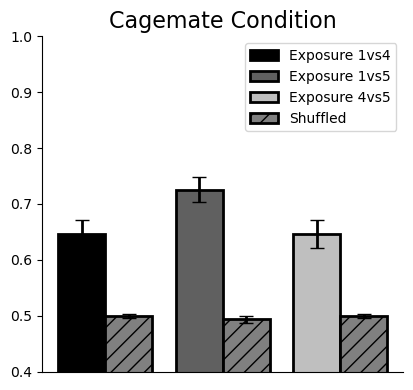

In [67]:
legend_titles = ['Exposure 1vs4', 'Exposure 1vs5', 'Exposure 4vs5']
colors = ['#000000', '#606060', '#bfbfbf']
plot_average([cagemate_results_1v4, cagemate_results_1v5, cagemate_results_4v5], title = 'Cagemate Condition', legend_titles = legend_titles, colors = colors, start = 0, stop = 3)

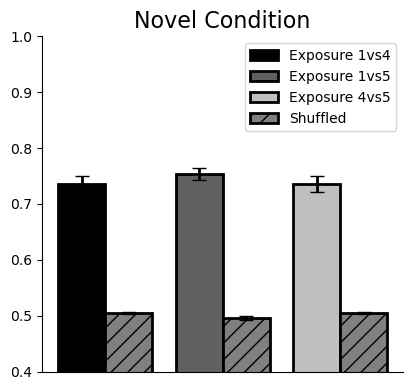

In [69]:
plot_average([novel_results_1v4, novel_results_1v5, novel_results_4v5], title = 'Novel Condition', legend_titles = legend_titles, colors = colors, start = 0, stop = 3)

Models ran with 5 folds
Events: dict_keys(['exp1'])
  exp1: Model Results
Average AUC score: 0.6459051069703244
Average AUC score for shuffled data: 0.5085989352262645


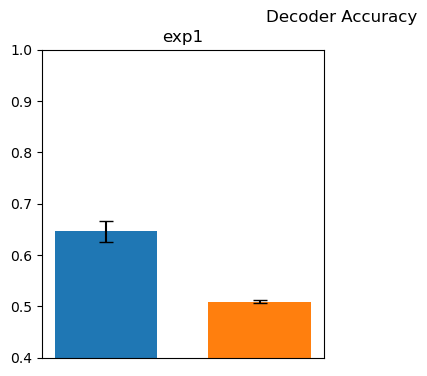

Models ran with 5 folds
Events: dict_keys(['exp1'])
  exp1: Model Results
Average AUC score: 0.7349226501035196
Average AUC score for shuffled data: 0.49879478260869553


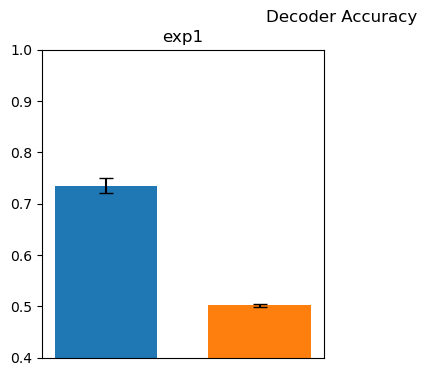

In [154]:
print(cagemate_results_1v4)
cagemate_results_1v4.plot_average()
print(novel_results_1v4)
novel_results_1v4.plot_average()

Models ran with 5 folds
Events: dict_keys(['exp1'])
  exp1: Model Results
Average AUC score: 0.7292078849176356
Average AUC score for shuffled data: 0.5099314628849776


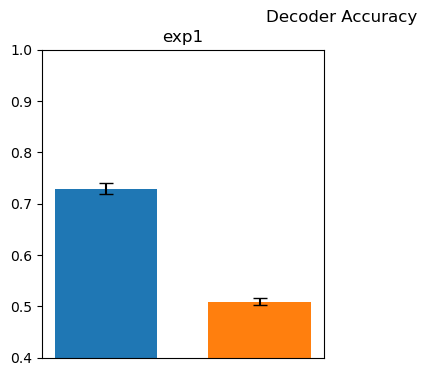

Models ran with 5 folds
Events: dict_keys(['exp1'])
  exp1: Model Results
Average AUC score: 0.7600724451159233
Average AUC score for shuffled data: 0.4933349187697014


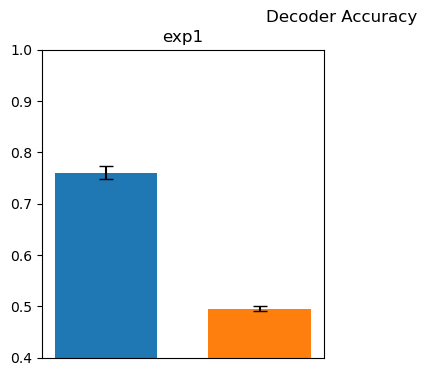

In [155]:
print(cagemate_results_1v5)
cagemate_results_1v5.plot_average()
print(novel_results_1v5)
novel_results_1v5.plot_average()

Models ran with 5 folds
Events: dict_keys(['exp4'])
  exp4: Model Results
Average AUC score: 0.6063570079803258
Average AUC score for shuffled data: 0.5074248626584289


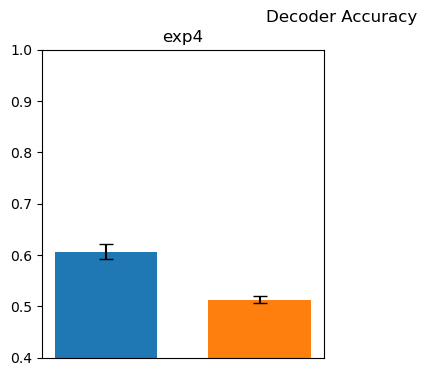

Models ran with 5 folds
Events: dict_keys(['exp4'])
  exp4: Model Results
Average AUC score: 0.6334362934362934
Average AUC score for shuffled data: 0.5029297297297297


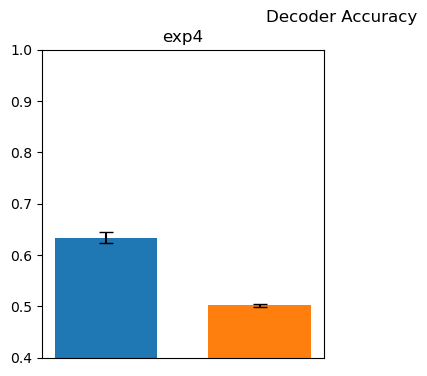

In [156]:
print(cagemate_results_4v5)
cagemate_results_4v5.plot_average()
print(novel_results_4v5)
novel_results_4v5.plot_average()

In [175]:
for recording in novel_collection.collection:
    novel = np.concatenate([recording.event_dict['exp1'], recording.event_dict['exp5']], axis = 0)
    recording.event_dict['novel'] = novel
    not_novel = np.concatenate([recording.event_dict['exp3'], recording.event_dict['exp4']], axis = 0)
    recording.event_dict['not_novel'] = not_novel
    
for recording in cagemate_collection.collection:
    novel = np.concatenate([recording.event_dict['exp1'], recording.event_dict['exp5']], axis = 0)
    recording.event_dict['novel'] = novel
    not_novel = np.concatenate([recording.event_dict['exp3'], recording.event_dict['exp4']], axis = 0)
    recording.event_dict['not_novel'] = not_novel

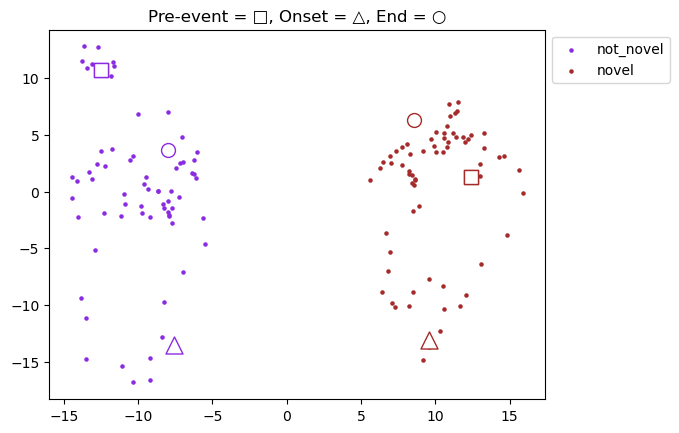

PCA Result with:
Events: not_novel, novel
Timebins per event: 70.0
Total neurons: 131
Number of recordings: 9
Number of Pcs needed to explain 90% of variance 13


In [159]:
pca_dict = pca_t.avg_trajectories_pca(cagemate_collection, event_length = event_length, pre_window = pre_window, events=['not_novel','novel'], d = 2, min_neurons = 5)
print(pca_dict)

In [176]:
cagemate_results_novel = decoder.trial_decoder(cagemate_collection, 5, 13, events = ['novel', 'not_novel'], event_length = event_length, pre_window = pre_window, min_neurons = 5)
novel_results_novel = decoder.trial_decoder(novel_collection, 5, 5, events = ['novel', 'not_novel'], event_length = event_length, pre_window = pre_window, min_neurons = 5)


In [177]:
pickle_this(novel_results_novel, "pilot2/habit_dishabit_phase1/novel_results_novel_not_novel.pkl")
pickle_this(cagemate_results_novel, "pilot2/habit_dishabit_phase1/cagemate_results_novel_not_novel.pkl")

Models ran with 5 folds
Events: dict_keys(['novel'])
  novel: Model Results
Average AUC score: 0.603342102145821
Average AUC score for shuffled data: 0.49872144636344606


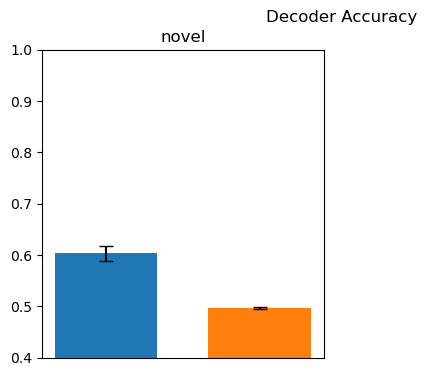

Models ran with 5 folds
Events: dict_keys(['novel'])
  novel: Model Results
Average AUC score: 0.695336492876223
Average AUC score for shuffled data: 0.5057720314992384


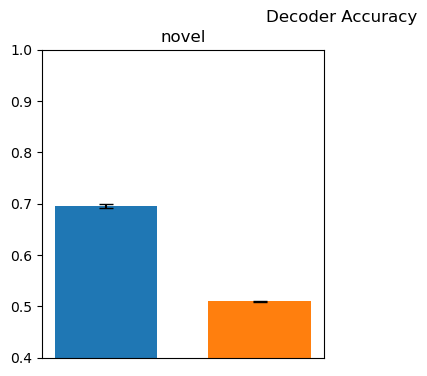

In [162]:
print(cagemate_results_novel)
cagemate_results_novel.plot_average()
print(novel_results_novel)
novel_results_novel.plot_average()